In [25]:
#import libraries

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats.stats import pearsonr
from scipy import stats

In [26]:
superbowl_data_path = "Data/Super_Bowl.csv"
superbowl_metadata = pd.read_csv(superbowl_data_path)

nfl_team_data_path = "Data/nfl_team_season.csv"
nfl_team_metadata = pd.read_csv(nfl_team_data_path)

superbowl_metadata

,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,...,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,15-Jan-67,I,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,Kansas City Chiefs,...,Los Angeles,California,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14-Jan-68,II,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,Oakland Raiders,...,Miami,Florida,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-Jan-69,III,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,Baltimore Colts,...,Miami,Florida,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-Jan-70,IV,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,Minnesota Vikings,...,New Orleans,Louisiana,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17-Jan-71,V,79204,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,16,Craig Morton,Tom Landry,Dallas Cowboys,...,Miami,Florida,3,Norm Schachter,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,NaN
5,16-Jan-72,VI,81023,Roger Staubach,Tom Landry,Dallas Cowboys,24,Bob Griese,Don Shula,Miami Dolphins,...,New Orleans,Louisiana,21,Jim Tunney,Joe Connell,Al Sabato,Art Holst,Bob Wortman,Ralph Vandenberg,NaN
6,14-Jan-73,VII,90182,Bob Griese,Don Shula,Miami Dolphins,14,Bill Kilmer,George Allen,Washington Redskins,...,Los Angeles,California,7,Tom Bell,Lou Palazzi,Tony Veteri,Bruce Alford,Tony Skover,Tom Kelleher,NaN
7,13-Jan-74,VIII,71882,Bob Griese,Don Shula,Miami Dolphins,24,Fran Tarkenton,Bud Grant,Minnesota Vikings,...,Houston,Texas,17,Ben Dreith,Ralph Morcroft,Leo Miles,Jack Fette,Fritz Graf,Stan Javie,NaN
8,12-Jan-75,IX,80997,Terry Bradshaw,Chuck Noll,Pittsburgh Steelers,16,Fran Tarkenton,Bud Grant,Minnesota Vikings,...,New Orleans,Louisiana,10,Bernie Ulman,Al Conway,Ed Marion,Bruce Alford,Dick Dolack,Ray Douglas,NaN
9,18-Jan-76,X,80187,Terry Bradshaw,Chuck Noll,Pittsburgh Steelers,21,Roger Staubach,Tom Landry,Dallas Cowboys,...,Miami,Florida,4,Norm Schachter,Joe Connell,Leo Miles,Jack Fette,Bill O'Brien,Stan Javie,NaN


In [27]:
winners = superbowl_metadata["Winner"].value_counts()
winners

Pittsburgh Steelers     6
Dallas Cowboys          5
San Francisco 49ers     5
New England Patriots    5
Green Bay Packers       4
New York Giants         4
Washington Redskins     3
Denver Broncos          3
Oakland Raiders         2
Baltimore Ravens        2
Miami Dolphins          2
Tampa Bay Buccaneers    1
Kansas City Chiefs      1
Chicago Bears           1
New York Jets           1
Los Angeles Raiders     1
Philadelphia Eagles     1
Seattle Seahawks        1
St. Louis Rams          1
Indianapolis Colts      1
Baltimore Colts         1
New Orleans Saints      1
Name: Winner, dtype: int64

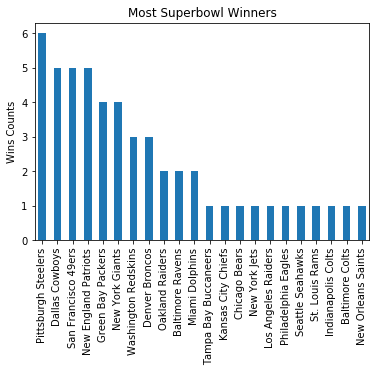

In [28]:
winners.plot(kind='bar')
plt.title("Most Superbowl Winners")
plt.ylabel("Wins Counts")
plt.show()

In [29]:
scores_table = superbowl_metadata[['Date','SB','Winner','Winning Pts','Point Difference', "Loser"]]
scores_table["Losing Pts"] = scores_table["Winning Pts"] - scores_table["Point Difference"]
scores_table

/Users/arvindbhamidipati/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,SB,Winner,Winning Pts,Point Difference,Loser,Losing Pts
0,15-Jan-67,I,Green Bay Packers,35,25,Kansas City Chiefs,10
1,14-Jan-68,II,Green Bay Packers,33,19,Oakland Raiders,14
2,12-Jan-69,III,New York Jets,16,9,Baltimore Colts,7
3,11-Jan-70,IV,Kansas City Chiefs,23,16,Minnesota Vikings,7
4,17-Jan-71,V,Baltimore Colts,16,3,Dallas Cowboys,13
5,16-Jan-72,VI,Dallas Cowboys,24,21,Miami Dolphins,3
6,14-Jan-73,VII,Miami Dolphins,14,7,Washington Redskins,7
7,13-Jan-74,VIII,Miami Dolphins,24,17,Minnesota Vikings,7
8,12-Jan-75,IX,Pittsburgh Steelers,16,10,Minnesota Vikings,6
9,18-Jan-76,X,Pittsburgh Steelers,21,4,Dallas Cowboys,17


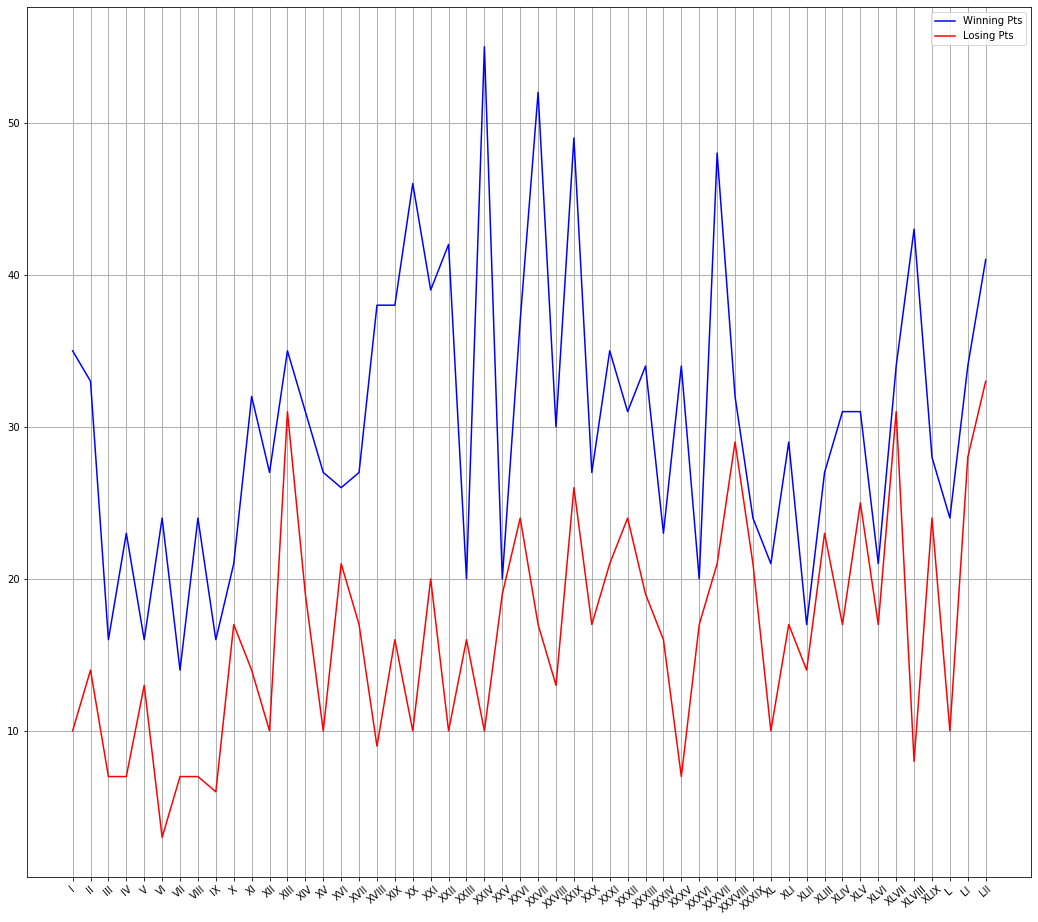

In [30]:
plt.figure(figsize=(18, 16))
plt.plot(scores_table.loc[:,"SB"], scores_table.loc[:,"Winning Pts"], color="blue", label="Winning Pts")
plt.plot(scores_table.loc[:,"SB"], scores_table.loc[:,"Losing Pts"], color="red", label="Losing Pts")
plt.xticks(rotation=40)
plt.grid(linewidth=1)
plt.legend()
plt.show()

In [31]:
winners_data = superbowl_metadata[['SB','Winner','Winning Pts','Point Difference', "Loser"]]
winners_data["Losing Pts"] = winners_data["Winning Pts"] - winners_data["Point Difference"]
winners_data.sort_values(by=['Winning Pts'], ascending=False)

/Users/arvindbhamidipati/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SB,Winner,Winning Pts,Point Difference,Loser,Losing Pts
23,XXIV,San Francisco 49ers,55,45,Denver Broncos,10
26,XXVII,Dallas Cowboys,52,35,Buffalo Bills,17
28,XXIX,San Francisco 49ers,49,23,San Diego Chargers,26
36,XXXVII,Tampa Bay Buccaneers,48,27,Oakland Raiders,21
19,XX,Chicago Bears,46,36,New England Patriots,10
47,XLVIII,Seattle Seahawks,43,35,Denver Broncos,8
21,XXII,Washington Redskins,42,32,Denver Broncos,10
51,LII,Philadelphia Eagles,41,8,New England Patriots,33
20,XXI,New York Giants,39,19,Denver Broncos,20
17,XVIII,Los Angeles Raiders,38,29,Washington Redskins,9


In [32]:
#find Superbowl Appearences
winner_loser_data = superbowl_metadata[['Winner','Loser']]
appearance_data = winner_loser_data.stack().value_counts()
appearance_data

New England Patriots    10
Dallas Cowboys           8
Pittsburgh Steelers      8
Denver Broncos           8
San Francisco 49ers      6
Green Bay Packers        5
New York Giants          5
Washington Redskins      5
Miami Dolphins           5
Buffalo Bills            4
Minnesota Vikings        4
Oakland Raiders          4
Philadelphia Eagles      3
Seattle Seahawks         3
Indianapolis Colts       2
St. Louis Rams           2
Chicago Bears            2
Baltimore Colts          2
Kansas City Chiefs       2
Atlanta Falcons          2
Baltimore Ravens         2
Cincinnati Bengals       2
Carolina Panthers        2
Los Angeles Rams         1
Tennessee Titans         1
Tampa Bay Buccaneers     1
Los Angeles Raiders      1
New York Jets            1
Arizona Cardinals        1
New Orleans Saints       1
San Diego Chargers       1
dtype: int64

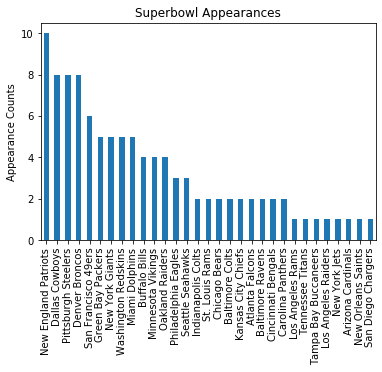

In [33]:
appearance_data.plot(kind='bar')
plt.title("Superbowl Appearances")
plt.ylabel("Appearance Counts")
plt.show()

In [42]:
#winning Streaks
winner_list = superbowl_metadata['Winner'].tolist()
losing_list = superbowl_metadata['Loser'].tolist()
winner_year = superbowl_metadata['Date'].tolist()
loser_year = superbowl_metadata['Date'].tolist()

winning_streaks = []
losing_streaks = []

for t in range(len(winner_list)-1):
    if winner_list[t] == winner_list[t+1]:
        winning_streaks.append(winner_list[t]+" "+winner_year[t]+" "+winner_year[t+1])

for t in range(len(losing_list)-1):
    if losing_list[t] == losing_list[t+1]:
        losing_streaks.append(losing_list[t]+" "+loser_year[t]+" "+loser_year[t+1])
    
#winning_streaks
losing_streaks

['Minnesota Vikings 13-Jan-74 12-Jan-75',
 'Denver Broncos 25-Jan-87 31-Jan-88',
 'Buffalo Bills 27-Jan-91 26-Jan-92',
 'Buffalo Bills 26-Jan-92 31-Jan-93',
 'Buffalo Bills 31-Jan-93 30-Jan-94']

In [38]:
#highest points scored in superbowl
sorted_by_points = scores_table.sort_values(by=['Winning Pts'], ascending = False)
sorted_by_points.head()

,Date,SB,Winner,Winning Pts,Point Difference,Loser,Losing Pts
23,28-Jan-90,XXIV,San Francisco 49ers,55,45,Denver Broncos,10
26,31-Jan-93,XXVII,Dallas Cowboys,52,35,Buffalo Bills,17
28,29-Jan-95,XXIX,San Francisco 49ers,49,23,San Diego Chargers,26
36,26-Jan-03,XXXVII,Tampa Bay Buccaneers,48,27,Oakland Raiders,21
19,26-Jan-86,XX,Chicago Bears,46,36,New England Patriots,10


In [39]:
#Largest point difference
largest_point_difference = scores_table.sort_values(by=['Point Difference'], ascending = False)
largest_point_difference.head()

,Date,SB,Winner,Winning Pts,Point Difference,Loser,Losing Pts
23,28-Jan-90,XXIV,San Francisco 49ers,55,45,Denver Broncos,10
19,26-Jan-86,XX,Chicago Bears,46,36,New England Patriots,10
26,31-Jan-93,XXVII,Dallas Cowboys,52,35,Buffalo Bills,17
47,2-Feb-14,XLVIII,Seattle Seahawks,43,35,Denver Broncos,8
21,31-Jan-88,XXII,Washington Redskins,42,32,Denver Broncos,10
